In [23]:
import pandas as pd

users = pd.read_csv("users.csv")
users.head()

,id,name,address,phone,email
0,44533,Hoyt Carter,"Apt. 300 8604 Ashlyn Wells, Effertzstad, ID 02997",(462) 385-4294,mckinley.rowe@harber.example
1,46128,Marco Kulas,"Apt. 538 816 Bechtelar Ferry, Lincolnhaven, KS...",913.466.4487,francisco@murray-cronin.test
2,46407,Denny Goyette LLD,"Apt. 174 39450 Mohr Rapids, Port Neomistad, AL...",(801) 970-3335,marguerita@wuckert.test
3,44602,Zackary Heller,"Apt. 608 74228 Bogan Valley, South Stepanieshi...",895.829.5417,annabelle@hessel.test
4,45828,Jess Beier,"2716 Jacobi Path, Ziemanntown, SC 65624-4660",(113) 784-3410,minh@hettinger.example


In [41]:
users.count()

id         3293
name       3293
address    3177
phone      3293
email      3293
dtype: int64

In [45]:
import yaml

with open("books.yaml", "r") as f:
    books_raw = yaml.safe_load(f)

books = pd.DataFrame([{k.lstrip(":"): v for k, v in d.items()} for d in books_raw])

print(books_raw[:5])
print(len(books_raw))

[{':id': 19199, ':title': 'The Yellow Meads of Asphodel', ':author': 'Carolyne West', ':genre': 'Classic', ':publisher': 'Mainstream Publishing', ':year': 2009}, {':id': 19398, ':title': 'From Here to Eternity', ':author': 'Rep. Heath Stiedemann, Gino Welch, Haydee Larson', ':genre': 'Short story', ':publisher': 'Vintage Books', ':year': 2001}, {':id': 19483, ':title': 'Eyeless in Gaza', ':author': 'Vannessa Price', ':genre': 'Biography/Autobiography', ':publisher': 'Pavilion Books', ':year': 1886}, {':id': 19506, ':title': 'Precious Bane', ':author': 'Miss Yong Wyman', ':genre': 'Realistic fiction', ':publisher': 'New English Library', ':year': 2021}, {':id': 19570, ':title': 'City of God', ':author': 'Travis Moore', ':genre': 'Suspense/Thriller', ':publisher': 'Bellevue Literary Press', ':year': 1847}]
753


In [37]:
books

,id,title,author,genre,publisher,year
0,19199,The Yellow Meads of Asphodel,Carolyne West,Classic,Mainstream Publishing,2009
1,19398,From Here to Eternity,"Rep. Heath Stiedemann, Gino Welch, Haydee Larson",Short story,Vintage Books,2001
2,19483,Eyeless in Gaza,Vannessa Price,Biography/Autobiography,Pavilion Books,1886
3,19506,Precious Bane,Miss Yong Wyman,Realistic fiction,New English Library,2021
4,19570,City of God,Travis Moore,Suspense/Thriller,Bellevue Literary Press,1847
...,...,...,...,...,...,...
748,19246,Eternal Sunshine of the Spotless Mind,Carisa Blick,Realistic fiction,Victor Gollancz Ltd,2020
749,19452,Command & Conquer: Tiberium Alliances,"Numbers Howell DDS, Tyson Treutel",Mythopoeia,Shire Books,1986
750,18843,Ice Climbers,"Jenice Bartell, Raye Watsica",Humor,NULL,1990
751,19494,Mad Max: Fury Road,Blythe Bernhard,Speech,Packt Publishing,2005


In [151]:
import pandas as pd

orders = pd.read_parquet("orders.parquet")
orders

,id,user_id,book_id,quantity,unit_price,timestamp,shipping
0,71389,47288,18976,2,27.00$,10/01/24 10:38:08 A.M.,None
1,66343,47049,19403,1,€50¢50,10:14;19-Oct-2024,"4940 Arnoldo Keys, West Arnette, KS 77599"
2,72606,46685,19500,1,USD 45.99,"22:13:35,2025-07-02",
3,68462,45336,18992,1,€ 71.00,2025-10-20 16:25:20,
4,72691,45311,19388,1,52.25 $,"08:48:47 A.M.,28-August-2024",None
...,...,...,...,...,...,...,...
11232,70045,45032,18966,1,57.99 EUR,04:51:02;04/06/25,"Apt. 657 809 Karisa Dale, Port Moseshire, IN 2..."
11233,72164,46481,18864,2,$71¢00,12:38:25 A.M. 2024-06-20,NULL
11234,70697,44686,19083,5,€50.,"11-Dec-2024, 14:52",NULL
11235,64646,46203,19190,1,44.75USD,11:09;05/17/25,


### Managing data and cleaning

In [121]:
import pandas as pd
import yaml
import pyarrow.parquet as pq
import re
import numpy as np
from datetime import datetime

### Users

In [67]:
users.head()

,id,name,address,phone,email
0,44533,Hoyt Carter,"Apt. 300 8604 Ashlyn Wells, Effertzstad, ID 02997",(462) 385-4294,mckinley.rowe@harber.example
1,46128,Marco Kulas,"Apt. 538 816 Bechtelar Ferry, Lincolnhaven, KS...",913.466.4487,francisco@murray-cronin.test
2,46407,Denny Goyette LLD,"Apt. 174 39450 Mohr Rapids, Port Neomistad, AL...",(801) 970-3335,marguerita@wuckert.test
3,44602,Zackary Heller,"Apt. 608 74228 Bogan Valley, South Stepanieshi...",895.829.5417,annabelle@hessel.test
4,45828,Jess Beier,"2716 Jacobi Path, Ziemanntown, SC 65624-4660",(113) 784-3410,minh@hettinger.example


In [69]:
print(len(users))

3293


In [75]:
for col in ["name", "address", "phone", "email"]:
    if col in users.columns:
        users[col] = users[col].astype(str).str.strip()

# cleaned users
users.head()

,id,name,address,phone,email
0,44533,Hoyt Carter,"Apt. 300 8604 Ashlyn Wells, Effertzstad, ID 02997",(462) 385-4294,mckinley.rowe@harber.example
1,46128,Marco Kulas,"Apt. 538 816 Bechtelar Ferry, Lincolnhaven, KS...",913.466.4487,francisco@murray-cronin.test
2,46407,Denny Goyette LLD,"Apt. 174 39450 Mohr Rapids, Port Neomistad, AL...",(801) 970-3335,marguerita@wuckert.test
3,44602,Zackary Heller,"Apt. 608 74228 Bogan Valley, South Stepanieshi...",895.829.5417,annabelle@hessel.test
4,45828,Jess Beier,"2716 Jacobi Path, Ziemanntown, SC 65624-4660",(113) 784-3410,minh@hettinger.example


In [89]:
users.iloc[4]['address']

'2716 Jacobi Path, Ziemanntown, SC 65624-4660'

In [254]:
def normalize_phone(phone):
    if pd.isna(phone):
        return np.nan
    
    # 1. keep only digits
    digits = re.sub(r"\D", "", str(phone))

    # 2. we expect 10 digits (US-like format in your data)
    if len(digits) != 10:
        return np.nan   # or return original if needed

    # 3. format XXX-XXX-XXXX
    return f"{digits[0:3]}-{digits[3:6]}-{digits[6:10]}"

In [256]:
users["phone_clean"] = users["phone"].apply(normalize_phone)

users.head()

,id,name,address,phone,email,phone_clean
0,44533,Hoyt Carter,"Apt. 300 8604 Ashlyn Wells, Effertzstad, ID 02997",(462) 385-4294,mckinley.rowe@harber.example,462-385-4294
1,46128,Marco Kulas,"Apt. 538 816 Bechtelar Ferry, Lincolnhaven, KS...",913.466.4487,francisco@murray-cronin.test,913-466-4487
2,46407,Denny Goyette LLD,"Apt. 174 39450 Mohr Rapids, Port Neomistad, AL...",(801) 970-3335,marguerita@wuckert.test,801-970-3335
3,44602,Zackary Heller,"Apt. 608 74228 Bogan Valley, South Stepanieshi...",895.829.5417,annabelle@hessel.test,895-829-5417
4,45828,Jess Beier,"2716 Jacobi Path, Ziemanntown, SC 65624-4660",(113) 784-3410,minh@hettinger.example,113-784-3410


### Orders

In [153]:
orders.head()

,id,user_id,book_id,quantity,unit_price,timestamp,shipping
0,71389,47288,18976,2,27.00$,10/01/24 10:38:08 A.M.,None
1,66343,47049,19403,1,€50¢50,10:14;19-Oct-2024,"4940 Arnoldo Keys, West Arnette, KS 77599"
2,72606,46685,19500,1,USD 45.99,"22:13:35,2025-07-02",
3,68462,45336,18992,1,€ 71.00,2025-10-20 16:25:20,
4,72691,45311,19388,1,52.25 $,"08:48:47 A.M.,28-August-2024",None


In [165]:
copy_orders = orders.copy()

copy_orders.head()

,id,user_id,book_id,quantity,unit_price,timestamp,shipping
0,71389,47288,18976,2,27.00$,10/01/24 10:38:08 A.M.,None
1,66343,47049,19403,1,€50¢50,10:14;19-Oct-2024,"4940 Arnoldo Keys, West Arnette, KS 77599"
2,72606,46685,19500,1,USD 45.99,"22:13:35,2025-07-02",
3,68462,45336,18992,1,€ 71.00,2025-10-20 16:25:20,
4,72691,45311,19388,1,52.25 $,"08:48:47 A.M.,28-August-2024",None


In [167]:
copy_orders.iloc[:10]['timestamp']

0            10/01/24 10:38:08 A.M.
1                 10:14;19-Oct-2024
2               22:13:35,2025-07-02
3               2025-10-20 16:25:20
4      08:48:47 A.M.,28-August-2024
5              00:52:59, 2024-07-01
6                 22:10:29 02/07/25
7                30-Oct-2024, 15:56
8    01:34:17 P.M. 11-November-2024
9         15-Jul-2024,01:16:06 A.M.
Name: timestamp, dtype: object

In [177]:
import re
import pandas as pd
from dateutil import parser

def parse_timestamp(s):
    if pd.isna(s):
        return pd.NaT
    
    # переводим в строку и убираем лишние пробелы по краям
    s = str(s).strip()
    
    # приводим AM/PM к нормальному виду
    s = s.replace("A.M.", "AM").replace("P.M.", "PM")
    s = s.replace("A.M", "AM").replace("P.M", "PM")
    s = s.replace("a.m.", "AM").replace("p.m.", "PM")
    s = s.replace("a.m", "AM").replace("p.m", "PM")
    s = s.replace("am", "AM").replace("pm", "PM")
    
    # заменяем ; и , на пробелы
    s = s.replace(";", " ").replace(",", " ")
    
    # схлопываем многократные пробелы в один
    s = re.sub(r"\s+", " ", s)
    
    try:
        # dayfirst=False -> формат с цифрами считаем как MM/DD/YY
        # fuzzy=True -> игнорируем лишние слова/символы, типа "September"
        dt = parser.parse(s, dayfirst=False, fuzzy=True)
        return dt
    except Exception:
        return pd.NaT

In [171]:
copy_orders["timestamp_parsed"] = copy_orders["timestamp"].apply(parse_timestamp)
copy_orders["date"] = copy_orders["timestamp_parsed"].dt.date

copy_orders.head()

,id,user_id,book_id,quantity,unit_price,timestamp,shipping,timestamp_parsed,date
0,71389,47288,18976,2,27.00$,10/01/24 10:38:08 A.M.,None,2024-10-01 10:38:08,2024-10-01
1,66343,47049,19403,1,€50¢50,10:14;19-Oct-2024,"4940 Arnoldo Keys, West Arnette, KS 77599",2024-10-19 10:14:00,2024-10-19
2,72606,46685,19500,1,USD 45.99,"22:13:35,2025-07-02",,2025-07-02 22:13:35,2025-07-02
3,68462,45336,18992,1,€ 71.00,2025-10-20 16:25:20,,2025-10-20 16:25:20,2025-10-20
4,72691,45311,19388,1,52.25 $,"08:48:47 A.M.,28-August-2024",None,2024-08-28 08:48:47,2024-08-28


In [239]:
import re
import numpy as np
import pandas as pd

def parse_price(p):
    if pd.isna(p):
        return np.nan

    s = str(p).strip().replace(" ", "")  # remove spaces

    # Replace ¢ → treat as decimal point
    s = s.replace("¢", ".")

    # ------------------------------------------
    # Case like: 22$75 → 22.75 or 50€50 → 60.0$
    # ------------------------------------------
    if ("$" in s or "€" in s) and "." not in s:
        parts = re.split(r"[$€]", s)
        if len(parts) == 2 and parts[0].isdigit() and parts[1].isdigit():
            value = float(parts[0] + "." + parts[1])
            return value if "$" in s else value * 1.2

    # ------------------------------------------
    # Extract number robustly
    # ------------------------------------------
    nums = re.findall(r"\d+(?:\.\d+)?", s)
    if not nums:
        return np.nan

    value = nums[0]

    # Fix trailing dot:  "65." → "65"
    if value.endswith("."):
        value = value[:-1]

    if value == "":
        return np.nan

    value = float(value)

    # ------------------------------------------
    # USD formats
    # ------------------------------------------
    if "$" in s or "USD" in s.upper():
        return value

    # ------------------------------------------
    # EUR formats (EUR, € anywhere)
    # ------------------------------------------
    if "€" in s or "EUR" in s.upper():
        return value * 1.2

    return np.nan

In [216]:
copy_orders.iloc[:10]['unit_price']

0       27.00$
1       €50¢50
2    USD 45.99
3      € 71.00
4      52.25 $
5       22$75¢
6       35 USD
7    33.00 USD
8     44.75USD
9      49.0USD
Name: unit_price, dtype: object

In [241]:
# 1. Конвертация цены
copy_orders["unit_price_usd"] = copy_orders["unit_price"].apply(parse_price)

# 5. Считаем revenue
copy_orders["paid_price"] = copy_orders["unit_price_usd"] * copy_orders["quantity"]

copy_orders.head()

,id,user_id,book_id,quantity,unit_price,timestamp,shipping,timestamp_parsed,date,unit_price_usd,paid_price
0,71389,47288,18976,2,27.00$,10/01/24 10:38:08 A.M.,None,2024-10-01 10:38:08,2024-10-01,27.00,54.00
1,66343,47049,19403,1,€50¢50,10:14;19-Oct-2024,"4940 Arnoldo Keys, West Arnette, KS 77599",2024-10-19 10:14:00,2024-10-19,60.60,60.60
2,72606,46685,19500,1,USD 45.99,"22:13:35,2025-07-02",,2025-07-02 22:13:35,2025-07-02,45.99,45.99
3,68462,45336,18992,1,€ 71.00,2025-10-20 16:25:20,,2025-10-20 16:25:20,2025-10-20,85.20,85.20
4,72691,45311,19388,1,52.25 $,"08:48:47 A.M.,28-August-2024",None,2024-08-28 08:48:47,2024-08-28,52.25,52.25


### Books

In [192]:
books.head()

,id,title,author,genre,publisher,year
0,19199,The Yellow Meads of Asphodel,Carolyne West,Classic,Mainstream Publishing,2009
1,19398,From Here to Eternity,"Rep. Heath Stiedemann, Gino Welch, Haydee Larson",Short story,Vintage Books,2001
2,19483,Eyeless in Gaza,Vannessa Price,Biography/Autobiography,Pavilion Books,1886
3,19506,Precious Bane,Miss Yong Wyman,Realistic fiction,New English Library,2021
4,19570,City of God,Travis Moore,Suspense/Thriller,Bellevue Literary Press,1847


In [214]:
books.iloc[:10][['author', 'genre']]

,author,genre
0,Carolyne West,Classic
1,"Rep. Heath Stiedemann, Gino Welch, Haydee Larson",Short story
2,Vannessa Price,Biography/Autobiography
3,Miss Yong Wyman,Realistic fiction
4,Travis Moore,Suspense/Thriller
5,Matthew Breitenberg,Legend
6,Julianne Keeling,Folklore
7,Alina Oberbrunner,Essay
8,Roni Davis,Crime/Detective
9,Laverne Lemke,Legend


In [220]:
new_books = books.copy()

new_books.head()

,id,title,author,genre,publisher,year
0,19199,The Yellow Meads of Asphodel,Carolyne West,Classic,Mainstream Publishing,2009
1,19398,From Here to Eternity,"Rep. Heath Stiedemann, Gino Welch, Haydee Larson",Short story,Vintage Books,2001
2,19483,Eyeless in Gaza,Vannessa Price,Biography/Autobiography,Pavilion Books,1886
3,19506,Precious Bane,Miss Yong Wyman,Realistic fiction,New English Library,2021
4,19570,City of God,Travis Moore,Suspense/Thriller,Bellevue Literary Press,1847


In [222]:
import re

def split_authors(s):
    # normalize separators: &, ; , | 
    s = re.sub(r"[;&|]", ",", s)
    parts = [p.strip() for p in s.split(",") if p.strip() != ""]
    return parts

new_books["author_list"] = new_books["author"].apply(split_authors)
new_books["author_set"] = new_books["author_list"].apply(lambda x: frozenset(x))

new_books.head()

,id,title,author,genre,publisher,year,author_list,author_set
0,19199,The Yellow Meads of Asphodel,Carolyne West,Classic,Mainstream Publishing,2009,[Carolyne West],(Carolyne West)
1,19398,From Here to Eternity,"Rep. Heath Stiedemann, Gino Welch, Haydee Larson",Short story,Vintage Books,2001,"[Rep. Heath Stiedemann, Gino Welch, Haydee Lar...","(Gino Welch, Rep. Heath Stiedemann, Haydee Lar..."
2,19483,Eyeless in Gaza,Vannessa Price,Biography/Autobiography,Pavilion Books,1886,[Vannessa Price],(Vannessa Price)
3,19506,Precious Bane,Miss Yong Wyman,Realistic fiction,New English Library,2021,[Miss Yong Wyman],(Miss Yong Wyman)
4,19570,City of God,Travis Moore,Suspense/Thriller,Bellevue Literary Press,1847,[Travis Moore],(Travis Moore)


### Working with all data

In [258]:
# users: id, name, address, phone, email
users_clean = users.copy()
users_clean = users_clean.rename(columns={"id": "user_id"})

# books: id, title, author, author_set, ...
books_clean = new_books.copy()
books_clean = books_clean.rename(columns={"id": "book_id"})

# orders: id, user_id, book_id, quantity, unit_price, timestamp, date, paid_price
orders_clean = copy_orders.copy()

# --- 2. Джойн orders + users ---
orders_users = orders_clean.merge(
    users_clean,
    on="user_id",
    how="left",
    suffixes=("", "_user")
)

# --- 3. Джойн с books ---
full = orders_users.merge(
    books_clean,
    on="book_id",
    how="left",
    suffixes=("", "_book")
)

full.head()


,id,user_id,book_id,quantity,unit_price,timestamp,shipping,timestamp_parsed,date,unit_price_usd,...,phone,email,phone_clean,title,author,genre,publisher,year,author_list,author_set
0,71389,47288,18976,2,27.00$,10/01/24 10:38:08 A.M.,None,2024-10-01 10:38:08,2024-10-01,27.00,...,761-056-4908,alexandria@herman.test,761-056-4908,Cinema Paradiso,Pres. Doug Donnelly,Fable,Oberon Books,0,[Pres. Doug Donnelly],(Pres. Doug Donnelly)
1,66343,47049,19403,1,€50¢50,10:14;19-Oct-2024,"4940 Arnoldo Keys, West Arnette, KS 77599",2024-10-19 10:14:00,2024-10-19,60.60,...,107-013-1615,heath@graham.test,107-013-1615,Of Human Bondage,Cassi Herman,Folklore,Parragon,1978,[Cassi Herman],(Cassi Herman)
2,72606,46685,19500,1,USD 45.99,"22:13:35,2025-07-02",,2025-07-02 22:13:35,2025-07-02,45.99,...,404 342 5576,dorsey@schimmel.test,404-342-5576,Hotel California,Delbert Emmerich II,Legend,Book League of America,1984,[Delbert Emmerich II],(Delbert Emmerich II)
3,68462,45336,18992,1,€ 71.00,2025-10-20 16:25:20,,2025-10-20 16:25:20,2025-10-20,85.20,...,112.073.0471,jared@schroeder.example,112-073-0471,Mother Night,Sondra O'Reilly,Folklore,Left Book Club,1978,[Sondra O'Reilly],(Sondra O'Reilly)
4,72691,45311,19388,1,52.25 $,"08:48:47 A.M.,28-August-2024",None,2024-08-28 08:48:47,2024-08-28,52.25,...,713-978-6789,damien@dickinson-ratke.example,713-978-6789,Raiders of the Lost Ark,Frankie Vandervort,Humor,Newnes,1981,[Frankie Vandervort],(Frankie Vandervort)


In [260]:
full.iloc[1]

id                                                      66343
user_id                                                 47049
book_id                                                 19403
quantity                                                    1
unit_price                                             €50¢50
timestamp                                   10:14;19-Oct-2024
shipping            4940 Arnoldo Keys, West Arnette, KS 77599
timestamp_parsed                          2024-10-19 10:14:00
date                                               2024-10-19
unit_price_usd                                           60.6
paid_price                                               60.6
name                                           Raven Connelly
address             4940 Arnoldo Keys, West Arnette, KS 77599
phone                                            107-013-1615
email                                       heath@graham.test
phone_clean                                      107-013-1615
title   

In [262]:
full.to_excel("full.xlsx", index=False)

In [264]:
users.to_excel("users.xlsx", index=False)

### Let's try to find the needed info based on the tasks

In [272]:
daily_revenue = (
    full.dropna(subset=["date"]) 
        .groupby("date", as_index=False)["paid_price"]
        .sum()
        .rename(columns={"paid_price": "daily_revenue"})
        .sort_values("date")
)

top5_days = daily_revenue.sort_values("daily_revenue", ascending=False).head(5)

print("TOP-5 дней по выручке (DATA1):")
print(top5_days)

TOP-5 дней по выручке (DATA1):
           date  daily_revenue
339  2025-01-02       3995.068
290  2024-11-14       3911.974
221  2024-09-06       3790.168
285  2024-11-09       3518.618
252  2024-10-07       3517.018


In [274]:
users['id'].nunique()

3293

In [276]:
full['user_id'].nunique()

3178

In [278]:
num_author_sets = new_books["author_set"].nunique()
print("Число уникальных множеств авторов (DATA1):", num_author_sets)

Число уникальных множеств авторов (DATA1): 325


In [280]:
author_popularity = (
    full.dropna(subset=["author_set"])
        .groupby("author_set")["quantity"]
        .sum()
        .sort_values(ascending=False)
)

top_author_set = author_popularity.index[0]
top_author_qty = author_popularity.iloc[0]

print("Самый популярный набор авторов (DATA1):", list(top_author_set))
print("Продано экземпляров:", top_author_qty)

Самый популярный набор авторов (DATA1): ['Arlinda Huel']
Продано экземпляров: 201


In [284]:
user_to_real = {uid: find(uid) for uid in users["id"]}

full["real_user"] = full["user_id"].map(user_to_real)

spending = (
    full.groupby("real_user")["paid_price"]
        .sum()
        .sort_values(ascending=False)
)

best_real_user = spending.index[0]
best_spent = spending.iloc[0]
best_user_ids = clusters[best_real_user]

print("Лучший покупатель (DATA1):")
print("Общая сумма покупок:", best_spent)
print("user_id, которые считаются этим человеком:", best_user_ids)

NameError: name 'find' is not defined

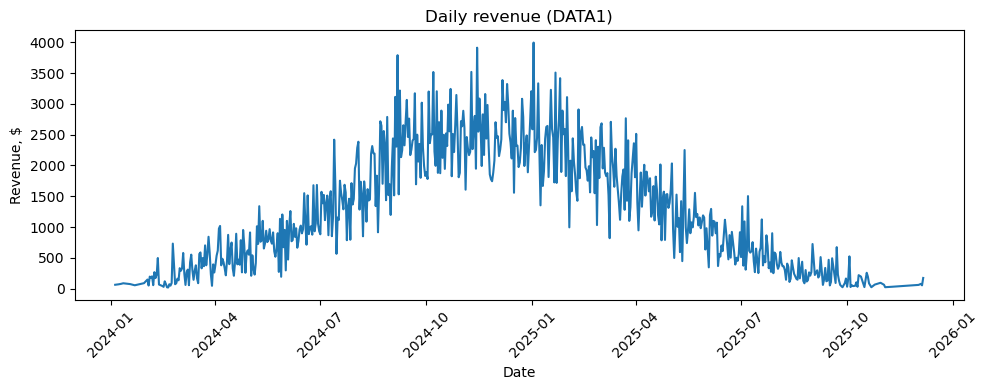

In [286]:
import matplotlib.pyplot as plt

daily_revenue = (
    full.dropna(subset=["date"])              
        .groupby("date", as_index=False)["paid_price"]
        .sum()
        .rename(columns={"paid_price": "daily_revenue"})
        .sort_values("date")
)

plt.figure(figsize=(10, 4))
plt.plot(daily_revenue["date"], daily_revenue["daily_revenue"])
plt.xlabel("Date")
plt.ylabel("Revenue, $")
plt.title("Daily revenue (DATA1)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()